In [1]:
import numpy as np
import pandas as pd
from sklearn import ensemble
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import cross_val_score
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn import manifold, decomposition, linear_model, ensemble, neighbors, cross_validation
import sklearn
from sklearn import pipeline, preprocessing, feature_extraction
%pylab inline

/home/fao3864/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Populating the interactive namespace from numpy and matplotlib


In [2]:
train = pd.read_csv('train.csv')


In [6]:
train

,Time,tag00,tag01,tag04,tag05,tag06,tag07,tag08,tag09,tag10,tag11,tag12,tag13,tag02,tag15,tag16,tag17,tag18
0,0.0,0.000000,283.149994,0.0,0.000000,0.0,283.000000,0.0,0.0,0.0,0.0,0.000000,0.010000,273.149994,0.0,0.1,100.000000,0.000000
1,1.0,0.000000,283.149994,0.0,0.000000,0.0,283.000000,0.0,0.0,0.0,0.0,0.000000,0.010000,273.149994,0.0,0.1,100.000000,0.000000
2,2.0,0.000000,283.149994,0.0,0.000000,0.0,283.000000,0.0,0.0,0.0,0.0,0.000000,0.010000,273.149994,0.0,0.1,100.000000,0.000000
3,3.0,0.000000,283.149994,0.0,0.000000,0.0,283.000000,0.0,0.0,0.0,0.0,0.000000,0.010000,273.149994,0.0,0.1,100.000000,0.000000
4,4.0,0.000000,283.149994,0.0,0.000000,0.0,283.000000,0.0,0.0,0.0,0.0,0.000000,0.010000,273.149994,0.0,0.1,100.000000,0.000000
5,5.0,0.000000,283.149994,0.0,0.000000,0.0,283.000000,0.0,0.0,0.0,0.0,0.000000,0.010000,273.149994,0.0,0.1,100.000000,0.000000
6,6.0,0.000000,283.149994,0.0,0.000000,0.0,283.000000,0.0,0.0,0.0,0.0,0.000000,0.010000,273.149994,0.0,0.1,100.000000,0.000000
7,7.0,0.000000,283.149994,0.0,0.000000,0.0,283.000000,0.0,0.0,0.0,0.0,0.000000,0.010000,273.149994,0.0,0.1,100.000000,0.000000
8,8.0,0.000000,283.149994,0.0,0.000000,0.0,283.000000,0.0,0.0,0.0,0.0,0.000000,0.010000,273.149994,0.0,0.1,100.000000,0.000000
9,9.0,0.000000,283.149994,0.0,0.000000,0.0,283.000000,0.0,0.0,0.0,0.0,0.000000,0.010000,273.149994,0.0,0.1,100.000000,0.000000


/home/fao3864/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


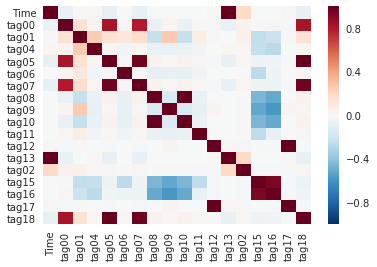

In [14]:

import seaborn as sns
CorrKoef = train.corr()
#pylab.figure(figsize=(50, 25))
sns.heatmap(CorrKoef, annot=False)
plt.show()

/home/fao3864/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


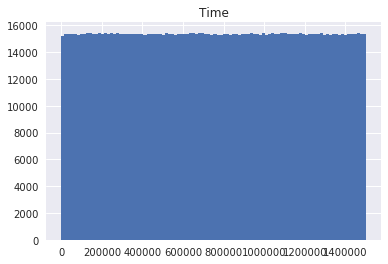

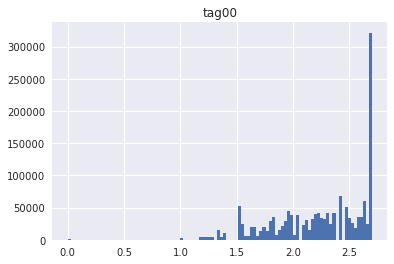

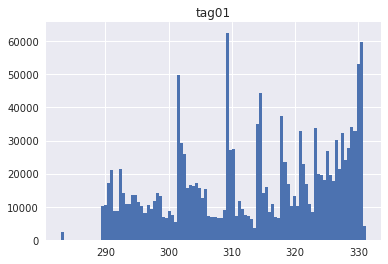

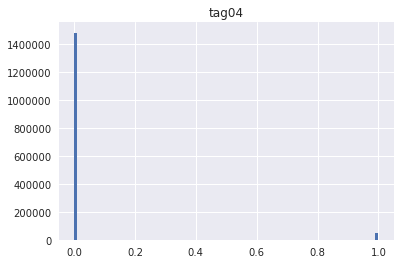

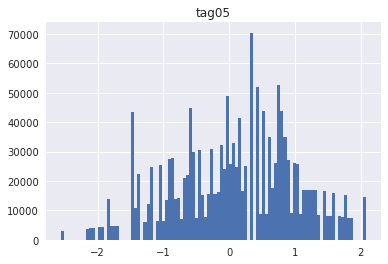

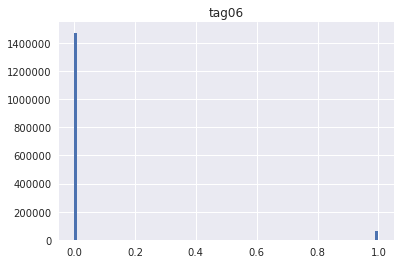

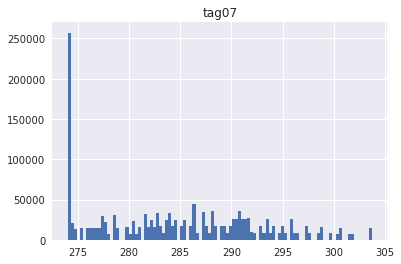

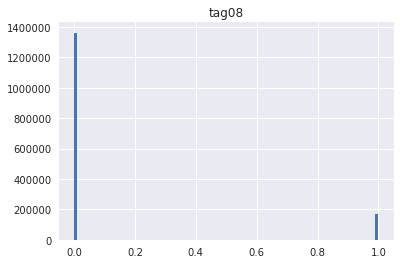

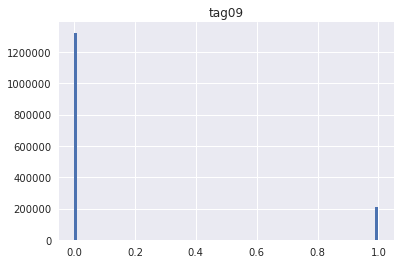

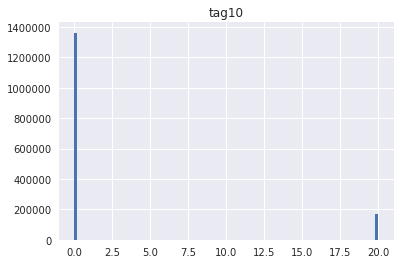

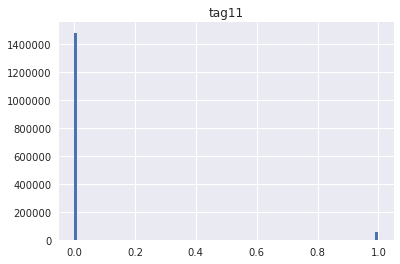

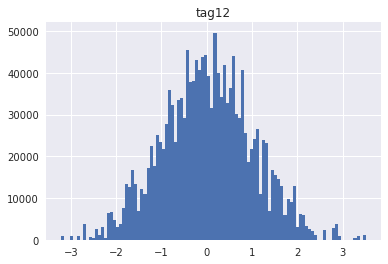

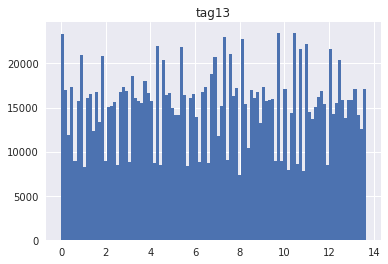

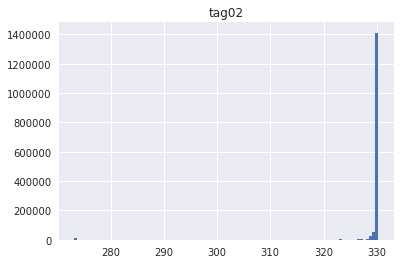

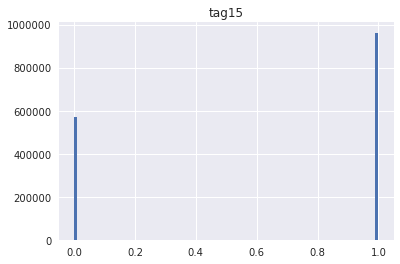

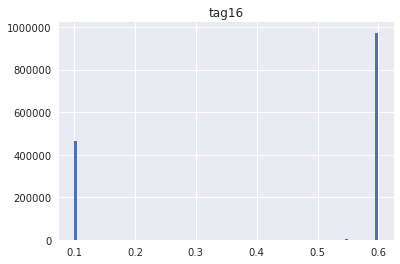

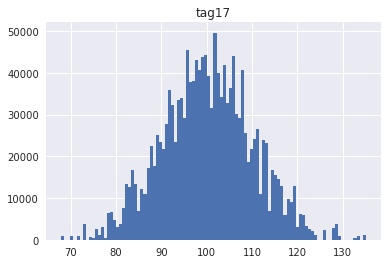

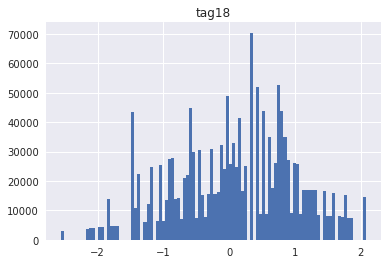

In [15]:
for i in train.columns:
    plt.title(i)
    #pylab.figure(figsize=(8, 6))
    plt.hist(train[i], bins=100)
    plt.show()

In [5]:
test = []
for i in range(48):
    test += [pd.read_csv('test/' + str(i) +'_test.csv')]

In [6]:
for i in test:
    print(len(i))

175139
195495
186190
183672
174611
192426
176914
187567
171224
187840
182751
171093
186679
186005
174681
198448
171764
183890
181131
170969
192127
195528
171672
172907
172458
195197
183071
178292
188151
198835
188948
196013
176581
197240
186951
176301
194897
194106
196066
176456
184415
189248
179459
177286
175597
188052
187541
192267


In [8]:
train.shape[0]

1535118

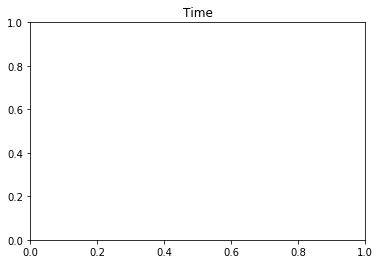

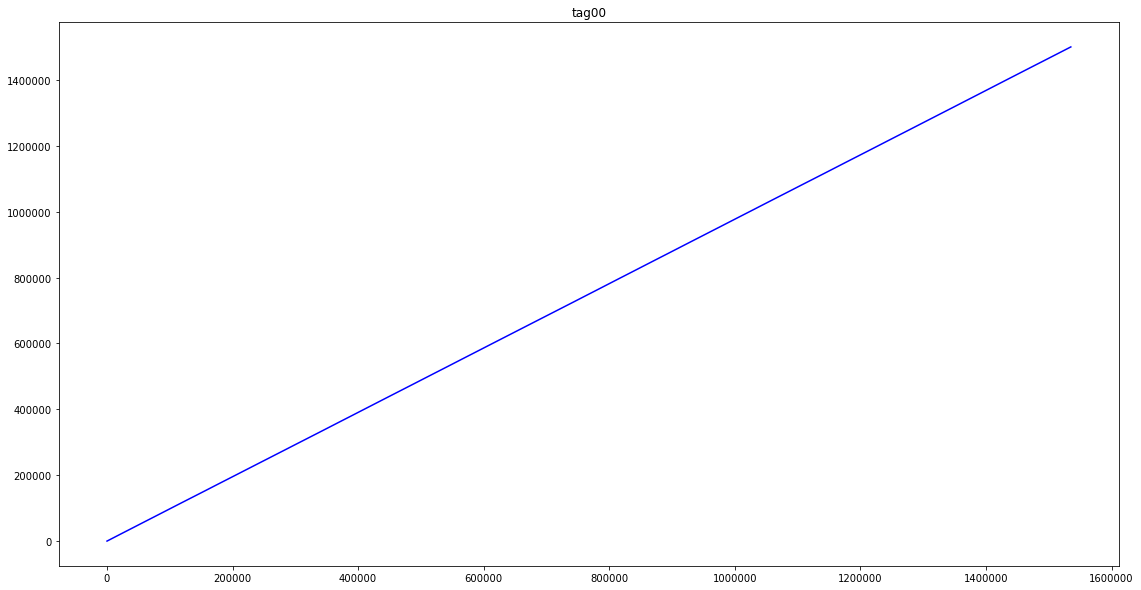

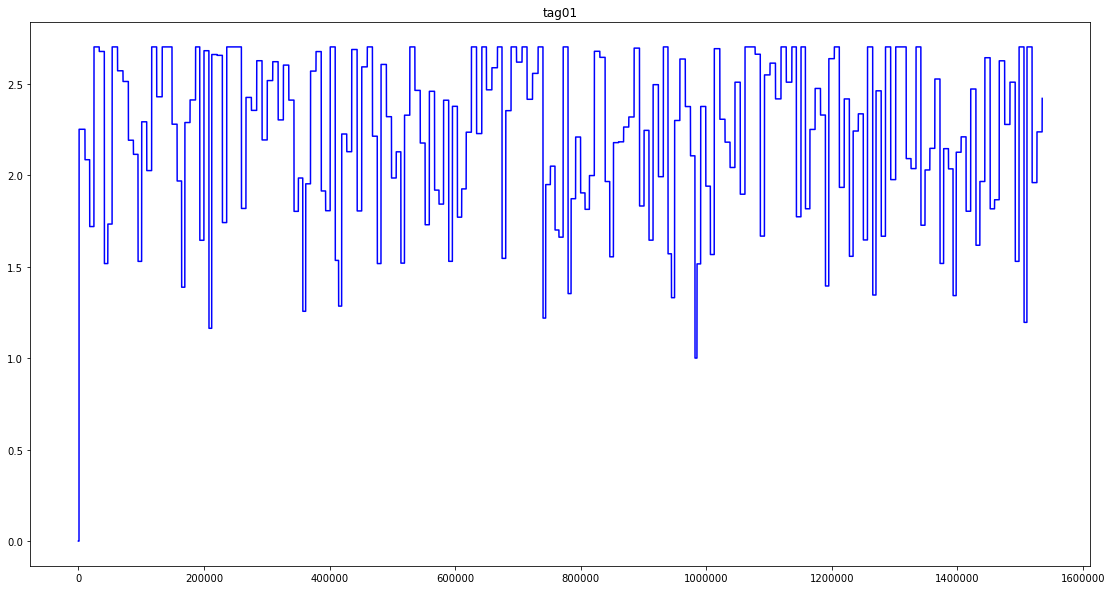

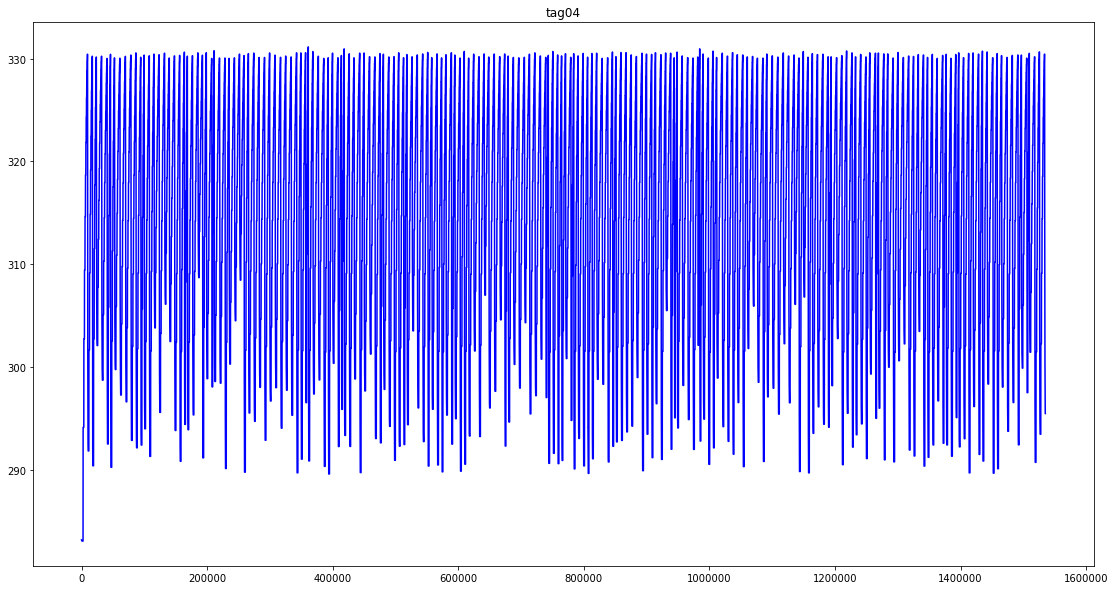

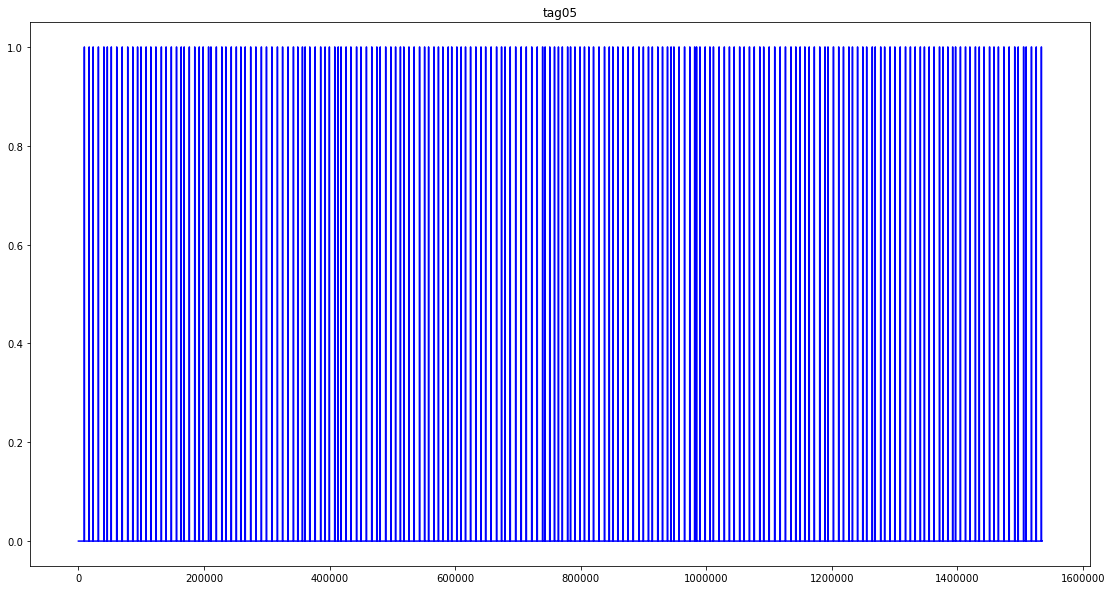

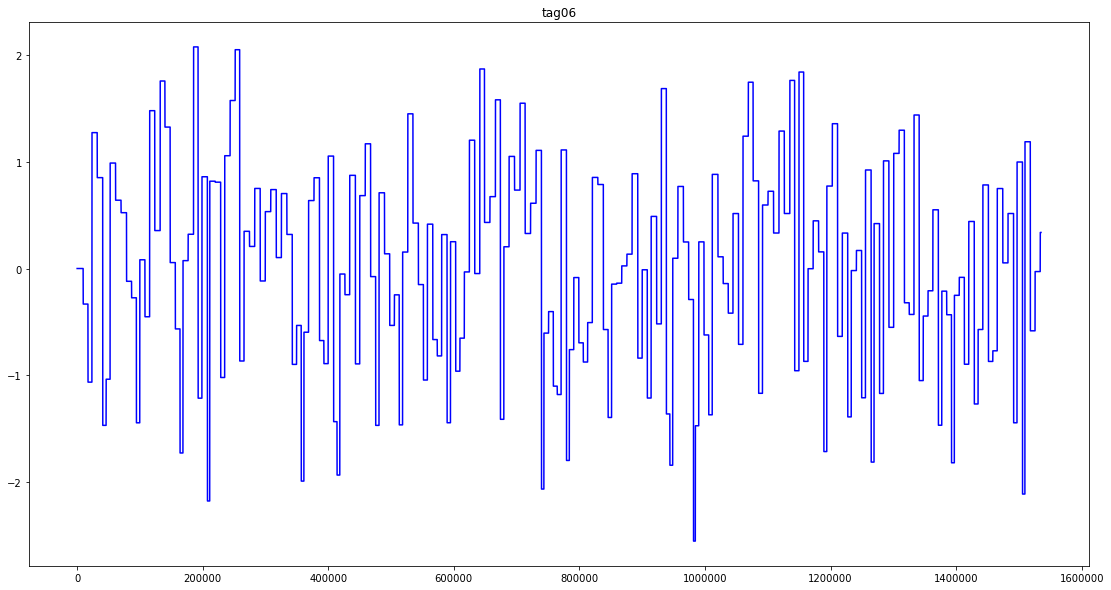

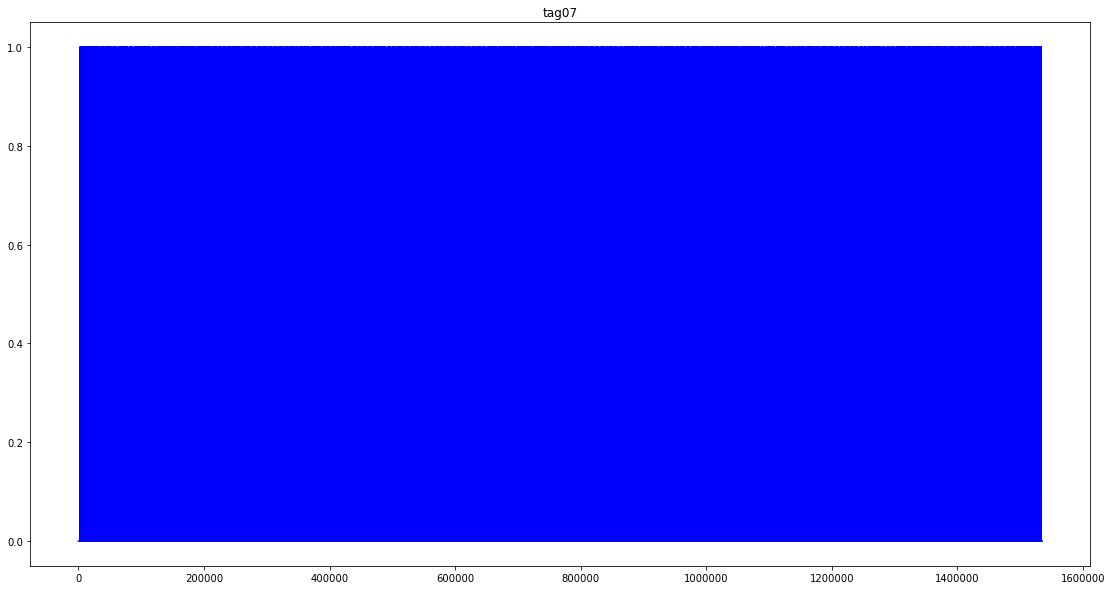

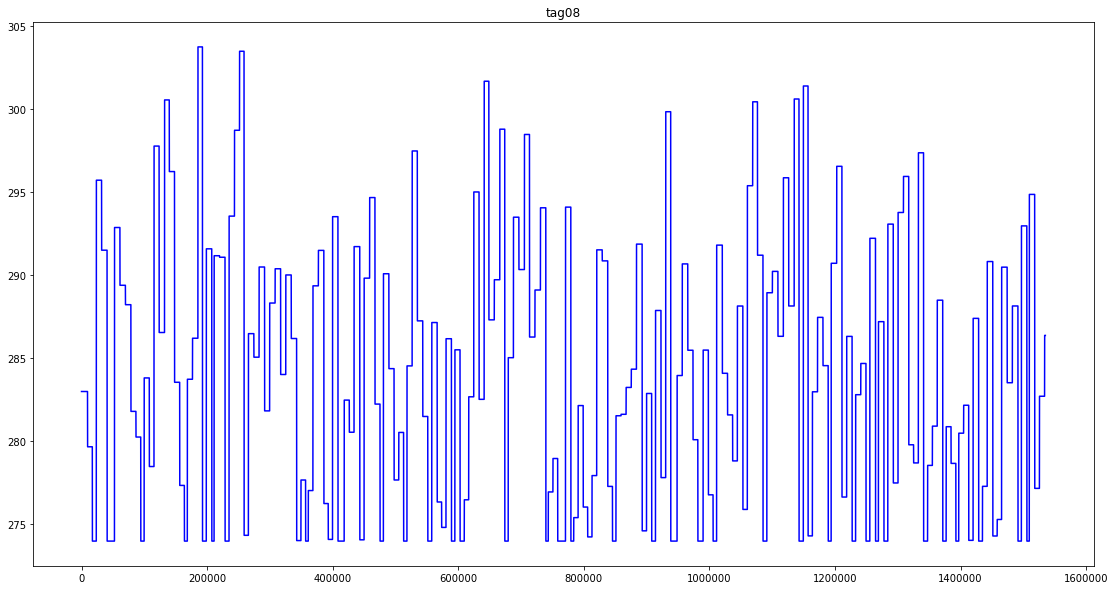

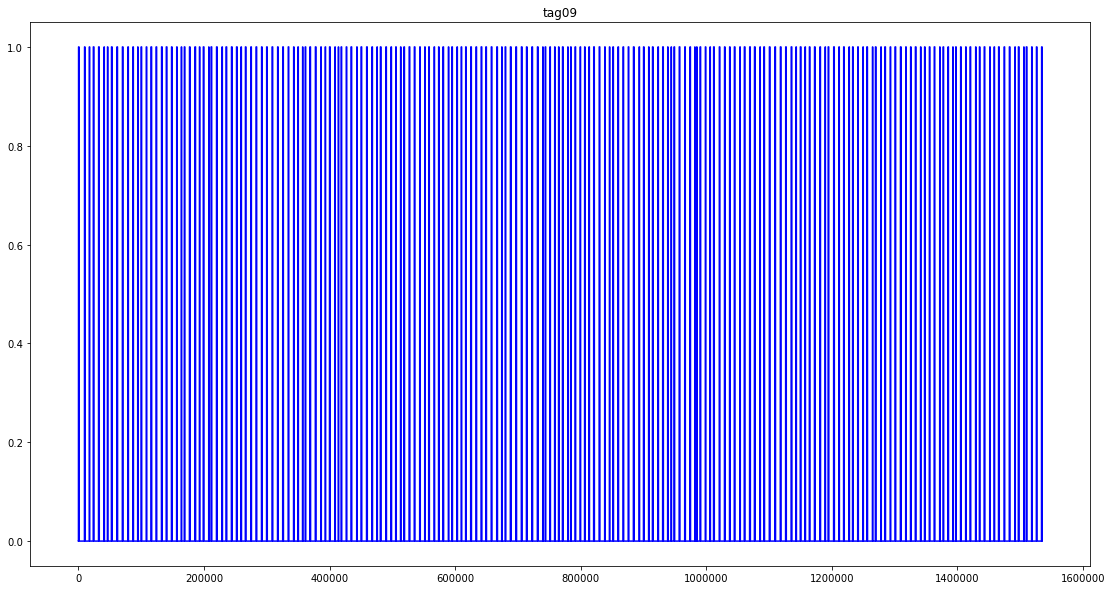

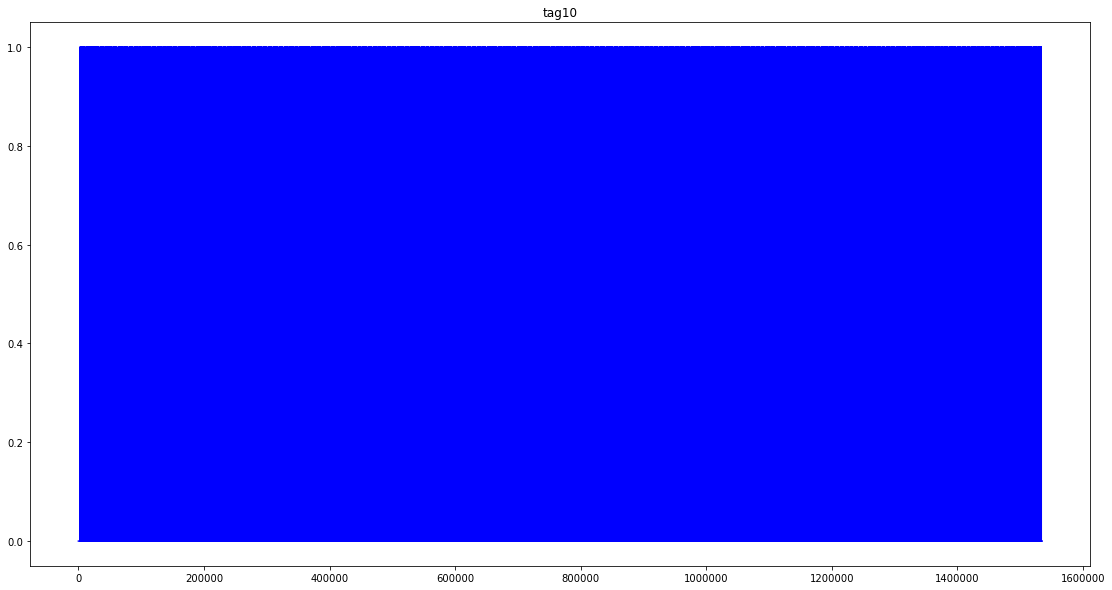

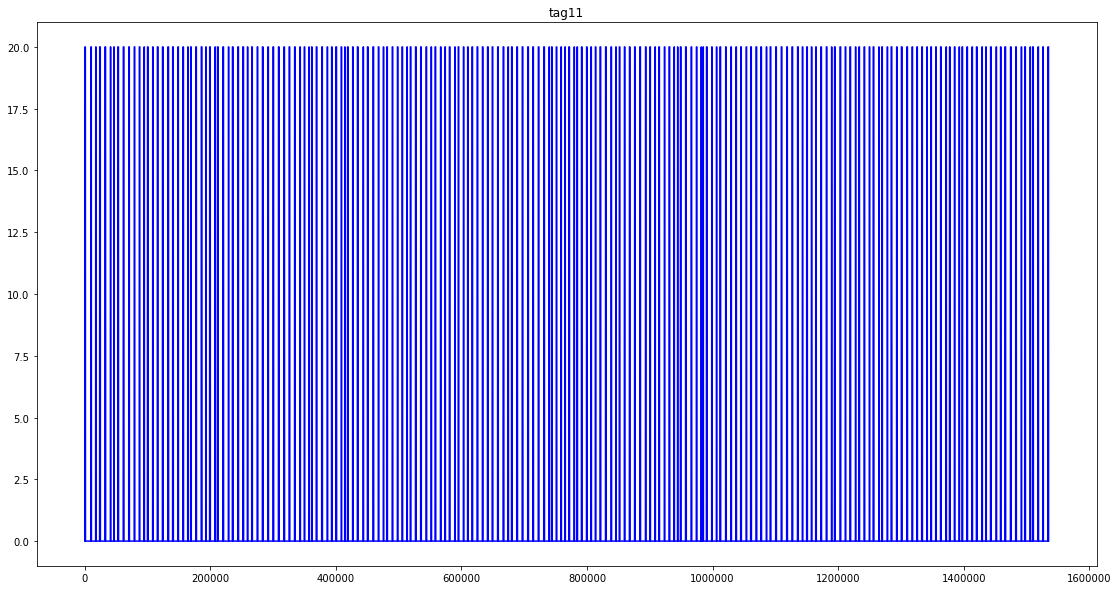

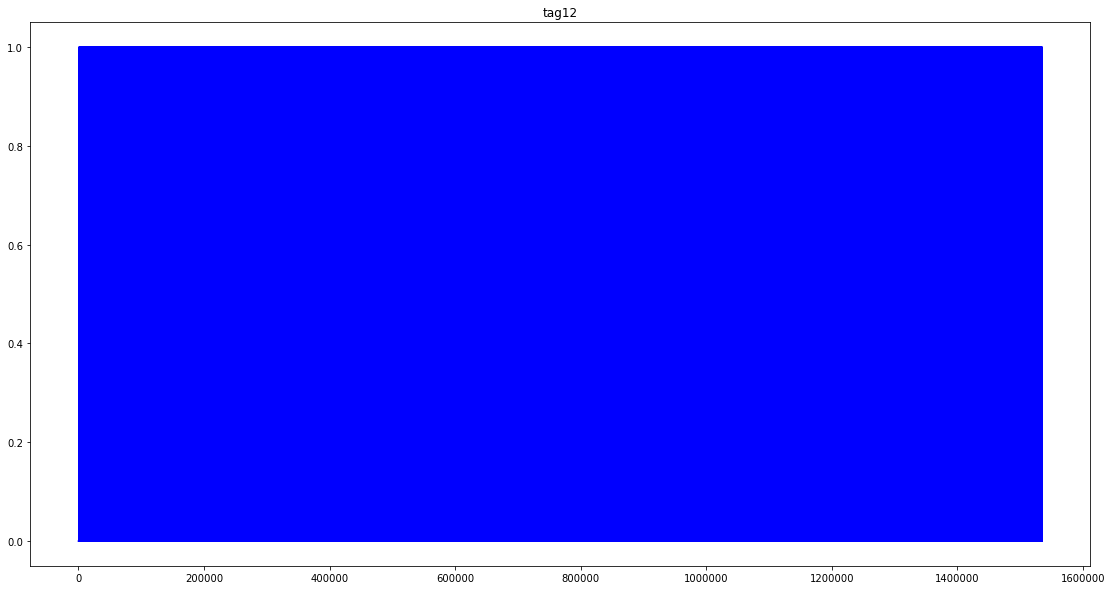

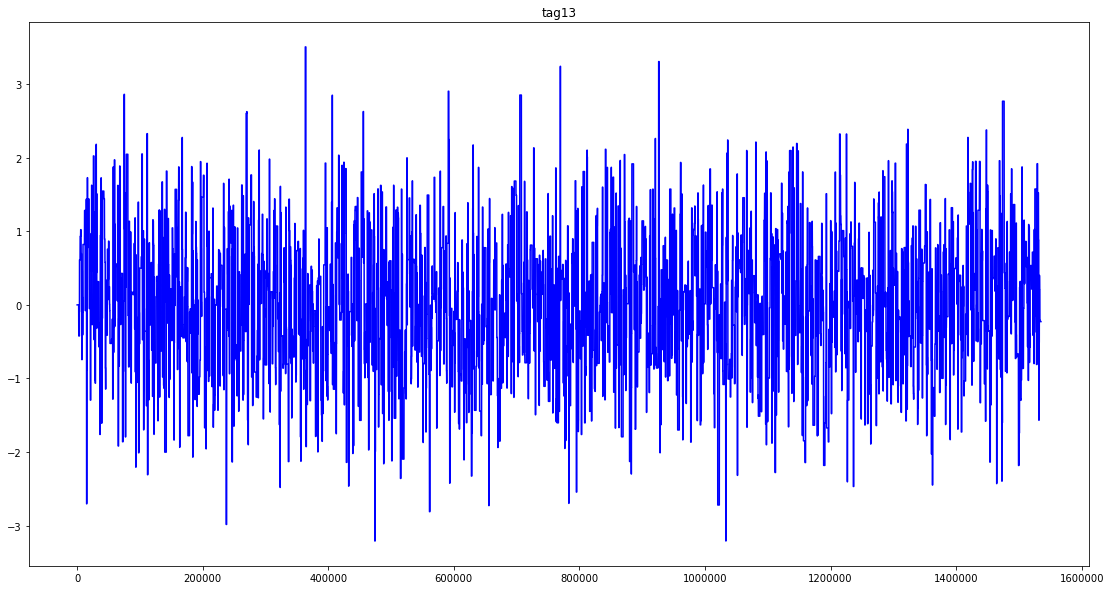

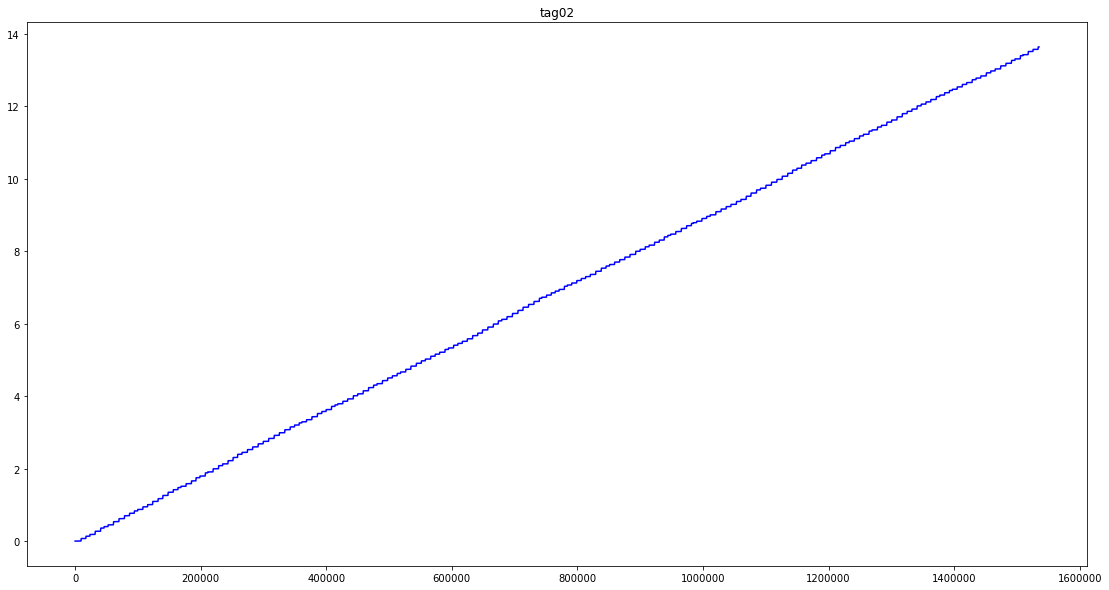

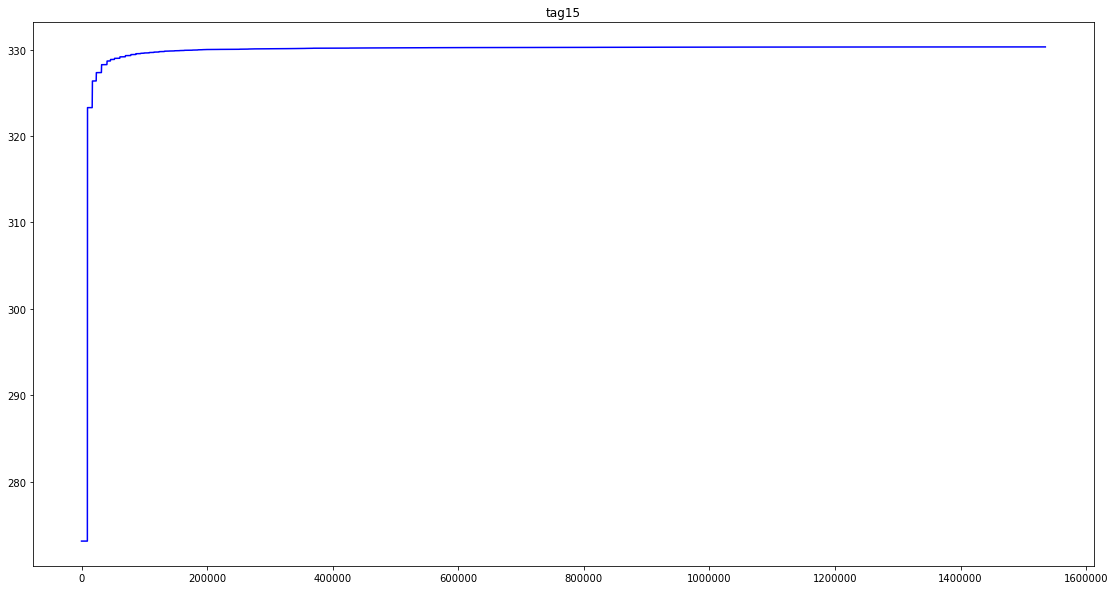

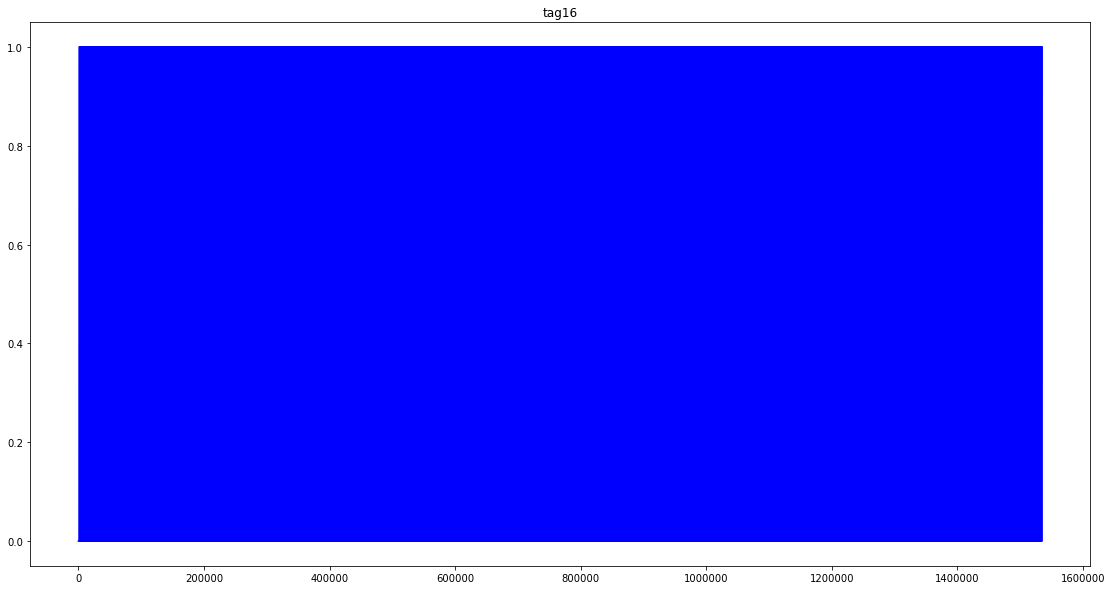

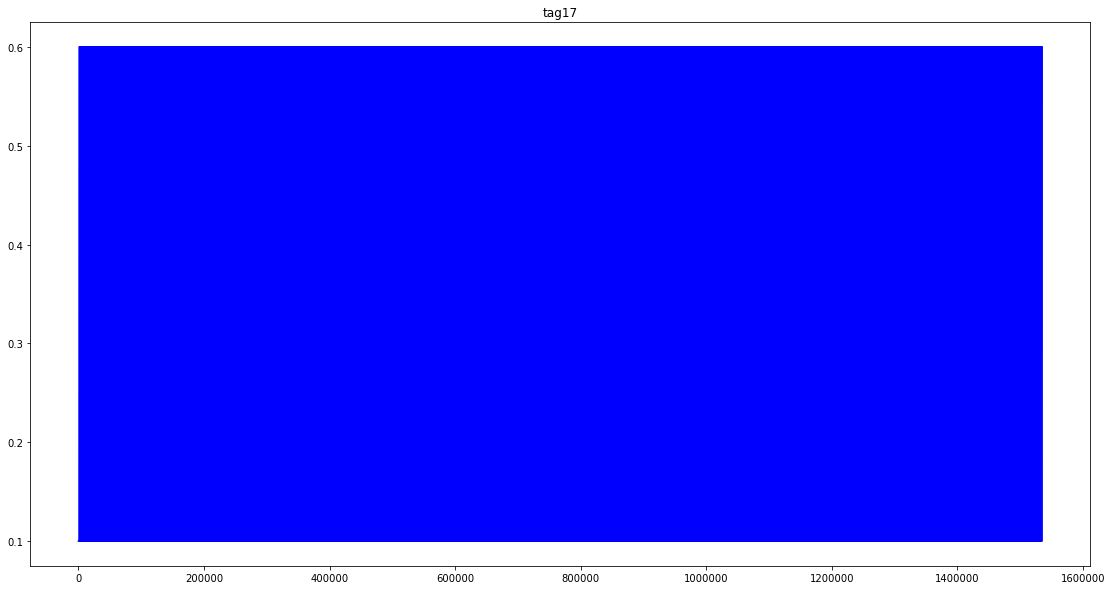

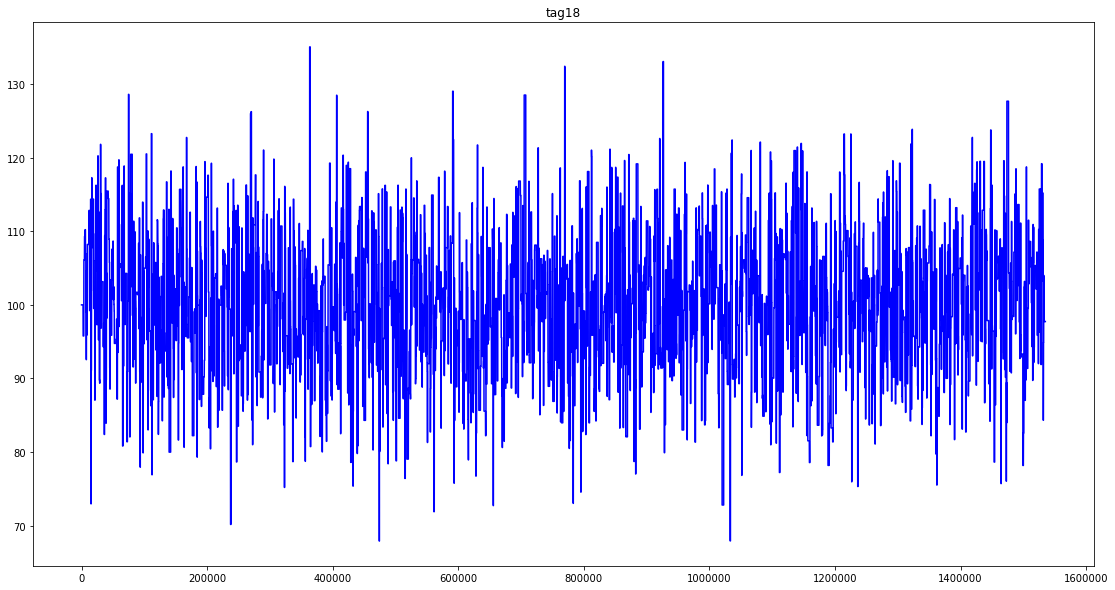

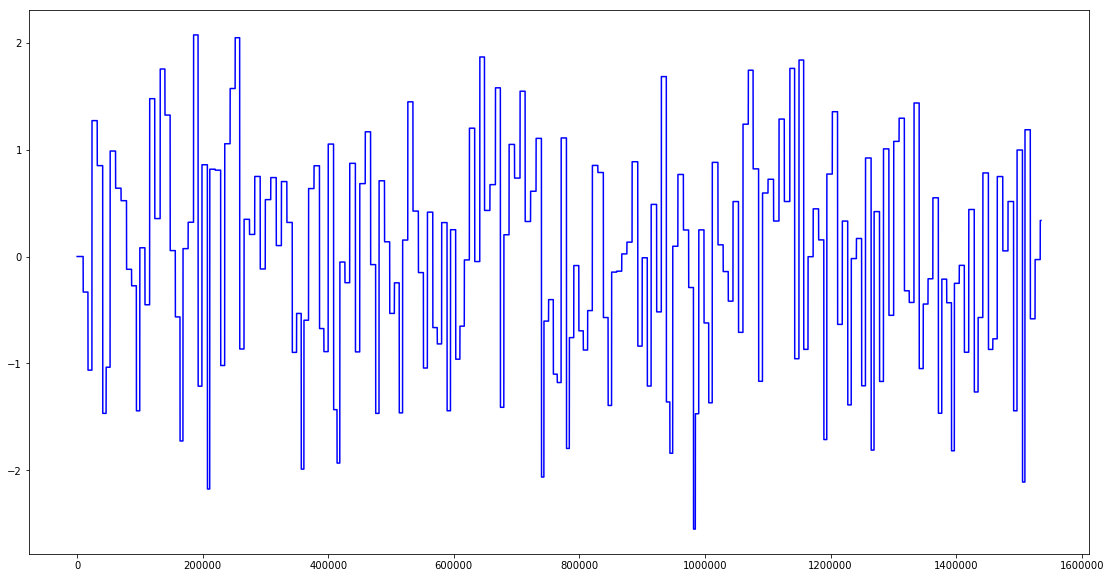

In [4]:
#test1 = test[0]
for i in train.columns:
    plt.title(i)
    plt.figure(figsize=(19, 10))
    plt.plot(train.ix[:, i], c='blue')
    #plt.plot(test2[i], c='red')
    #plt.plot(test3[i], c='g')





In [ ]:
for i in test:
    plt.figure(figsize=(19, 10))
    plt.plot(i['tag14'], c='blue')


In [4]:
res = pd.read_csv('~/sample_submission.csv', header=None)
res[1] = 100000
res.ix[0,1] = 49974.46
res.to_csv('const_100000.csv', index=False, header=None)

In [5]:
res

,0,1
0,0,49974.46
1,1,100000.00
2,2,100000.00
3,3,100000.00
4,4,100000.00
5,5,100000.00
6,6,100000.00
7,7,100000.00
8,8,100000.00
9,9,100000.00
